In [18]:
import numpy as np
import dlc_bci as bci
import pandas as pd
from functools import reduce
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
N_CHA = 28
N_SAMPLES = 50

In [20]:
train_input, train_target = bci.load(root = './data_bci')
X = train_input.numpy()
y = train_target.numpy()

X_1 = X[y==1]
X_0 = X[y==0]

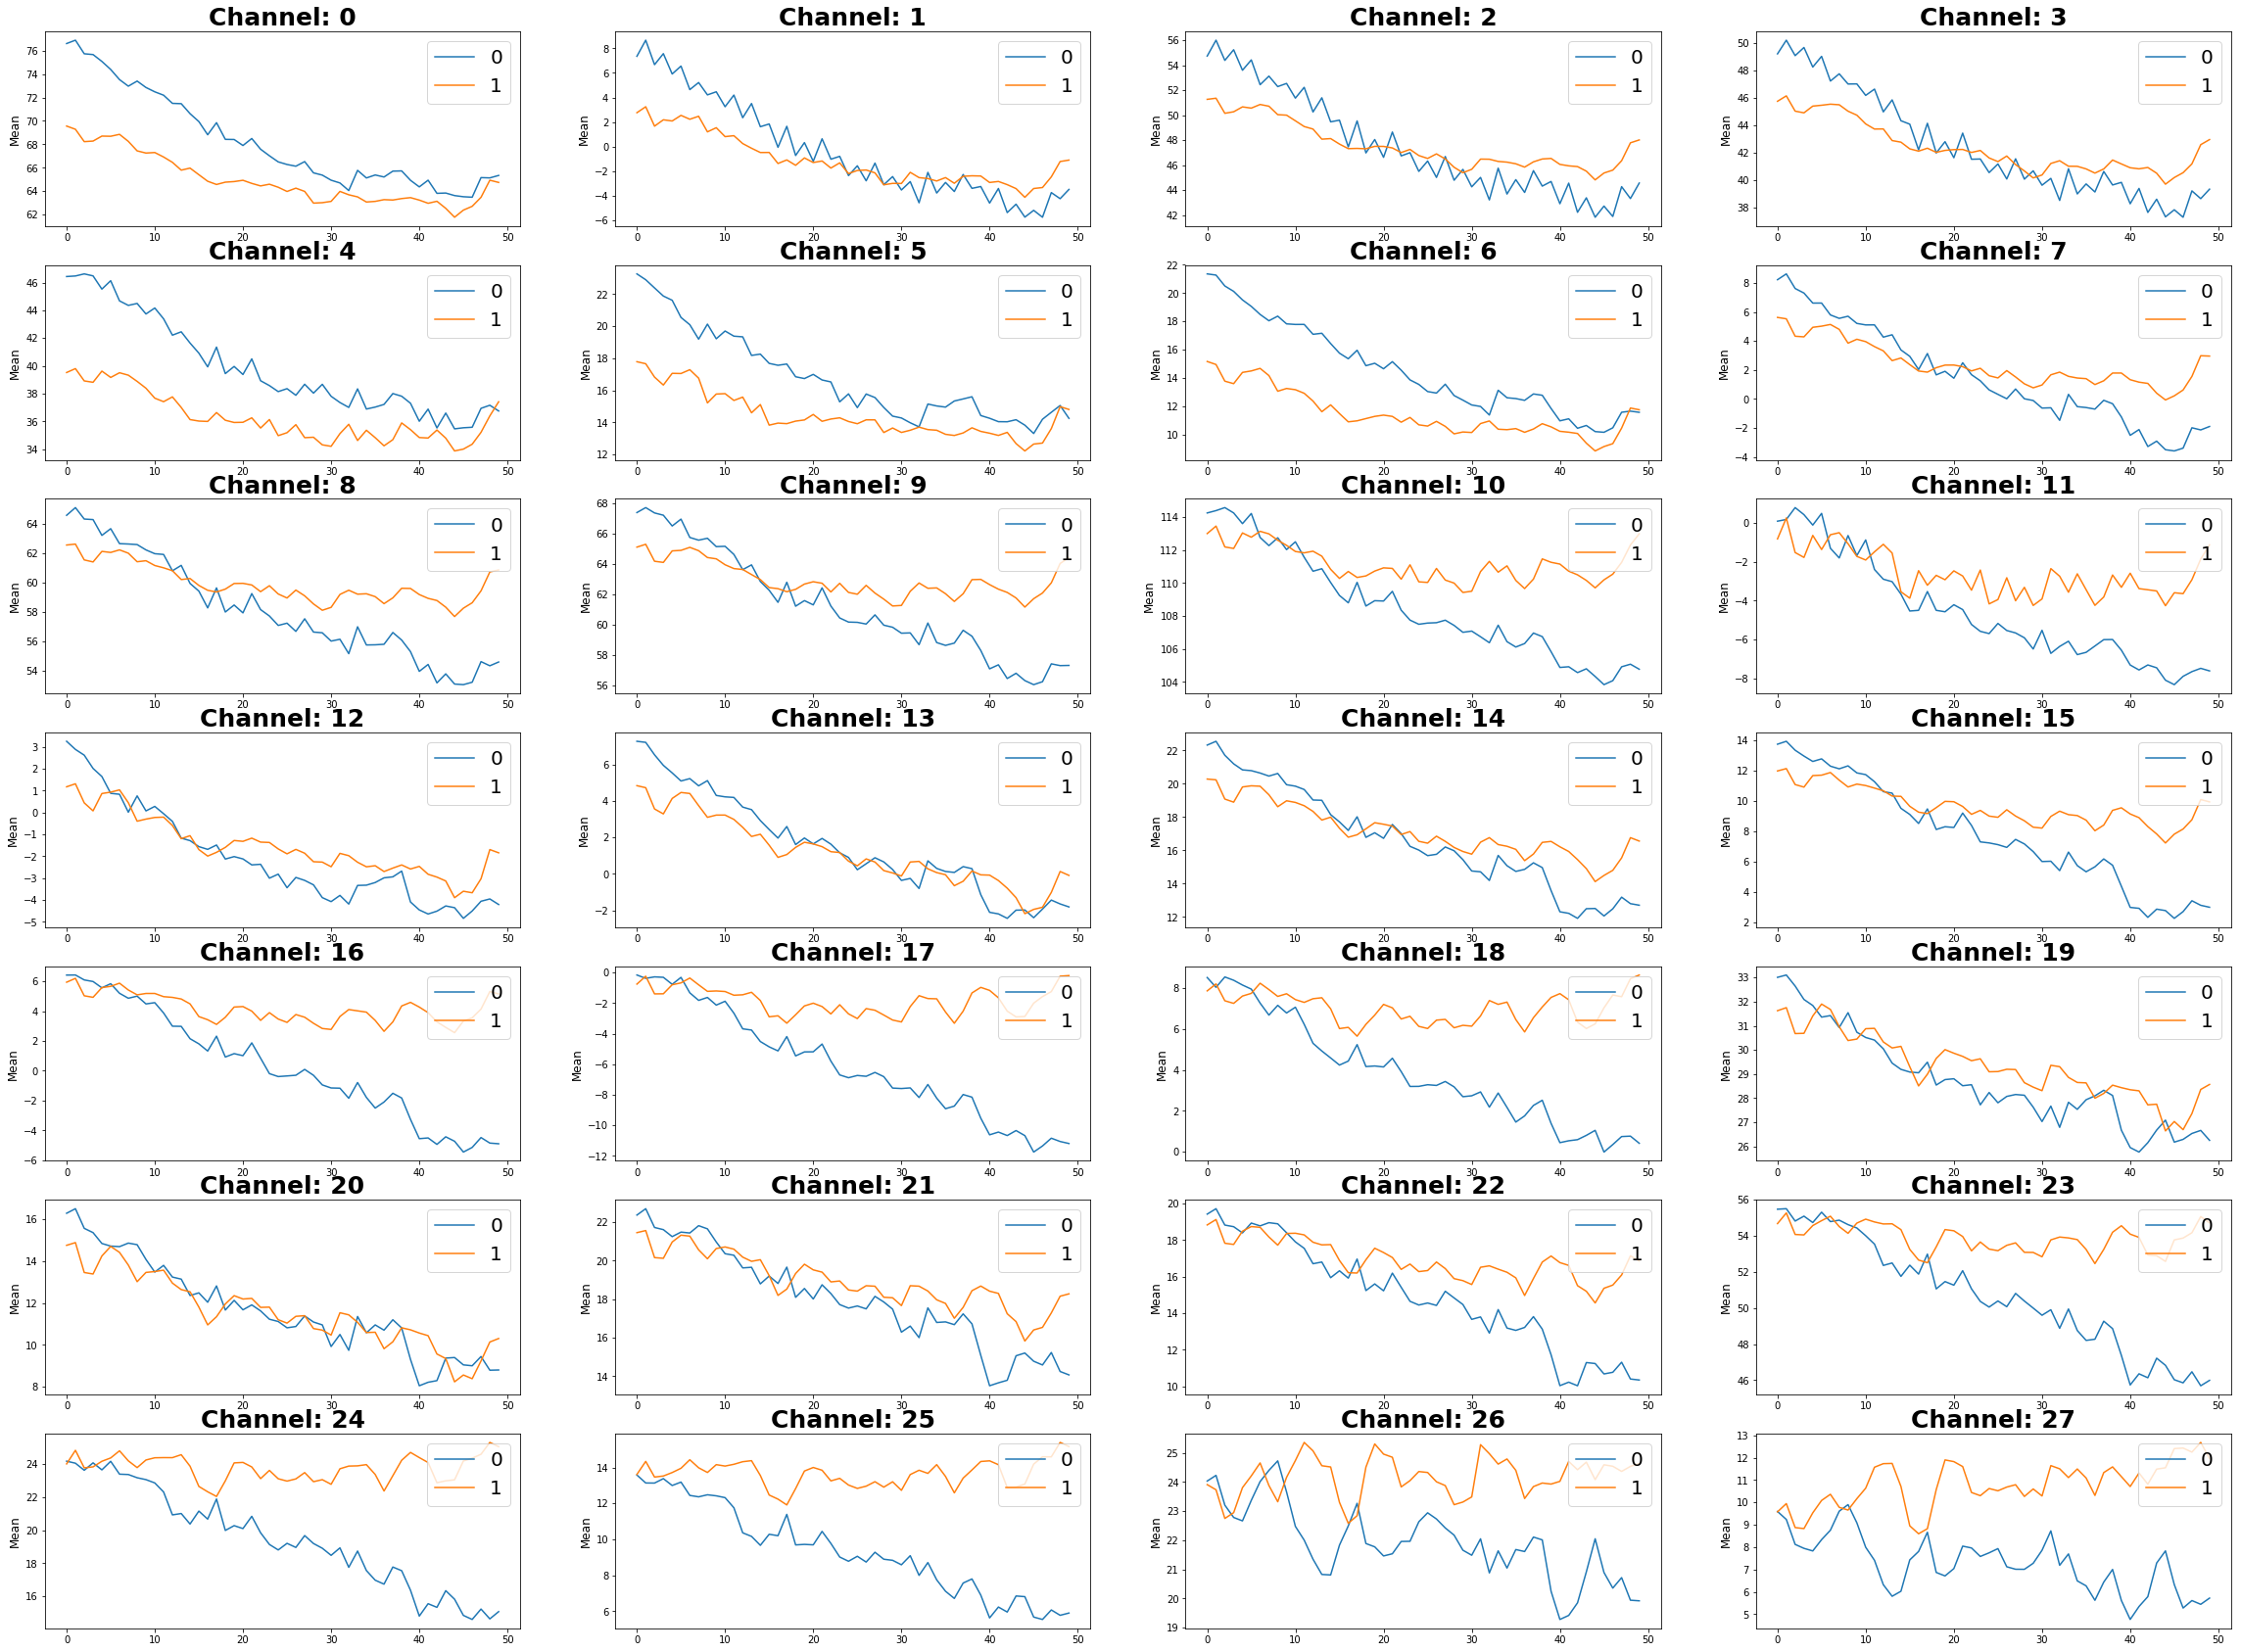

In [21]:
f, ax = plt.subplots(7, 4, figsize=(40, 30))
positions = np.array(range(28)).reshape(7, 4)

for c in range(N_CHA):
    means_1 = list(X_1[:, c, :].mean(0))
    means_0 = list(X_0[:, c, :].mean(0))
    
    pos = np.where(positions==c)
    ax[pos]
    ax[pos[0][0], pos[1][0]].plot(list(zip(means_0, means_1)))
    ax[pos[0][0], pos[1][0]].set_title('Channel: {}'.format(c), fontsize=25, fontweight='bold')
#     ax[pos[0][0], pos[1][0]].set_xlabel('Samples')
    ax[pos[0][0], pos[1][0]].legend([0, 1], loc='upper right', fontsize=20)
    ax[pos[0][0], pos[1][0]].set_ylabel('Mean', fontsize=12)

In [22]:
train_input, train_target = bci.load(root = './data_bci', one_khz=True)
X = train_input.numpy()
y = train_target.numpy()

X_1 = X[y==1]
X_0 = X[y==0]

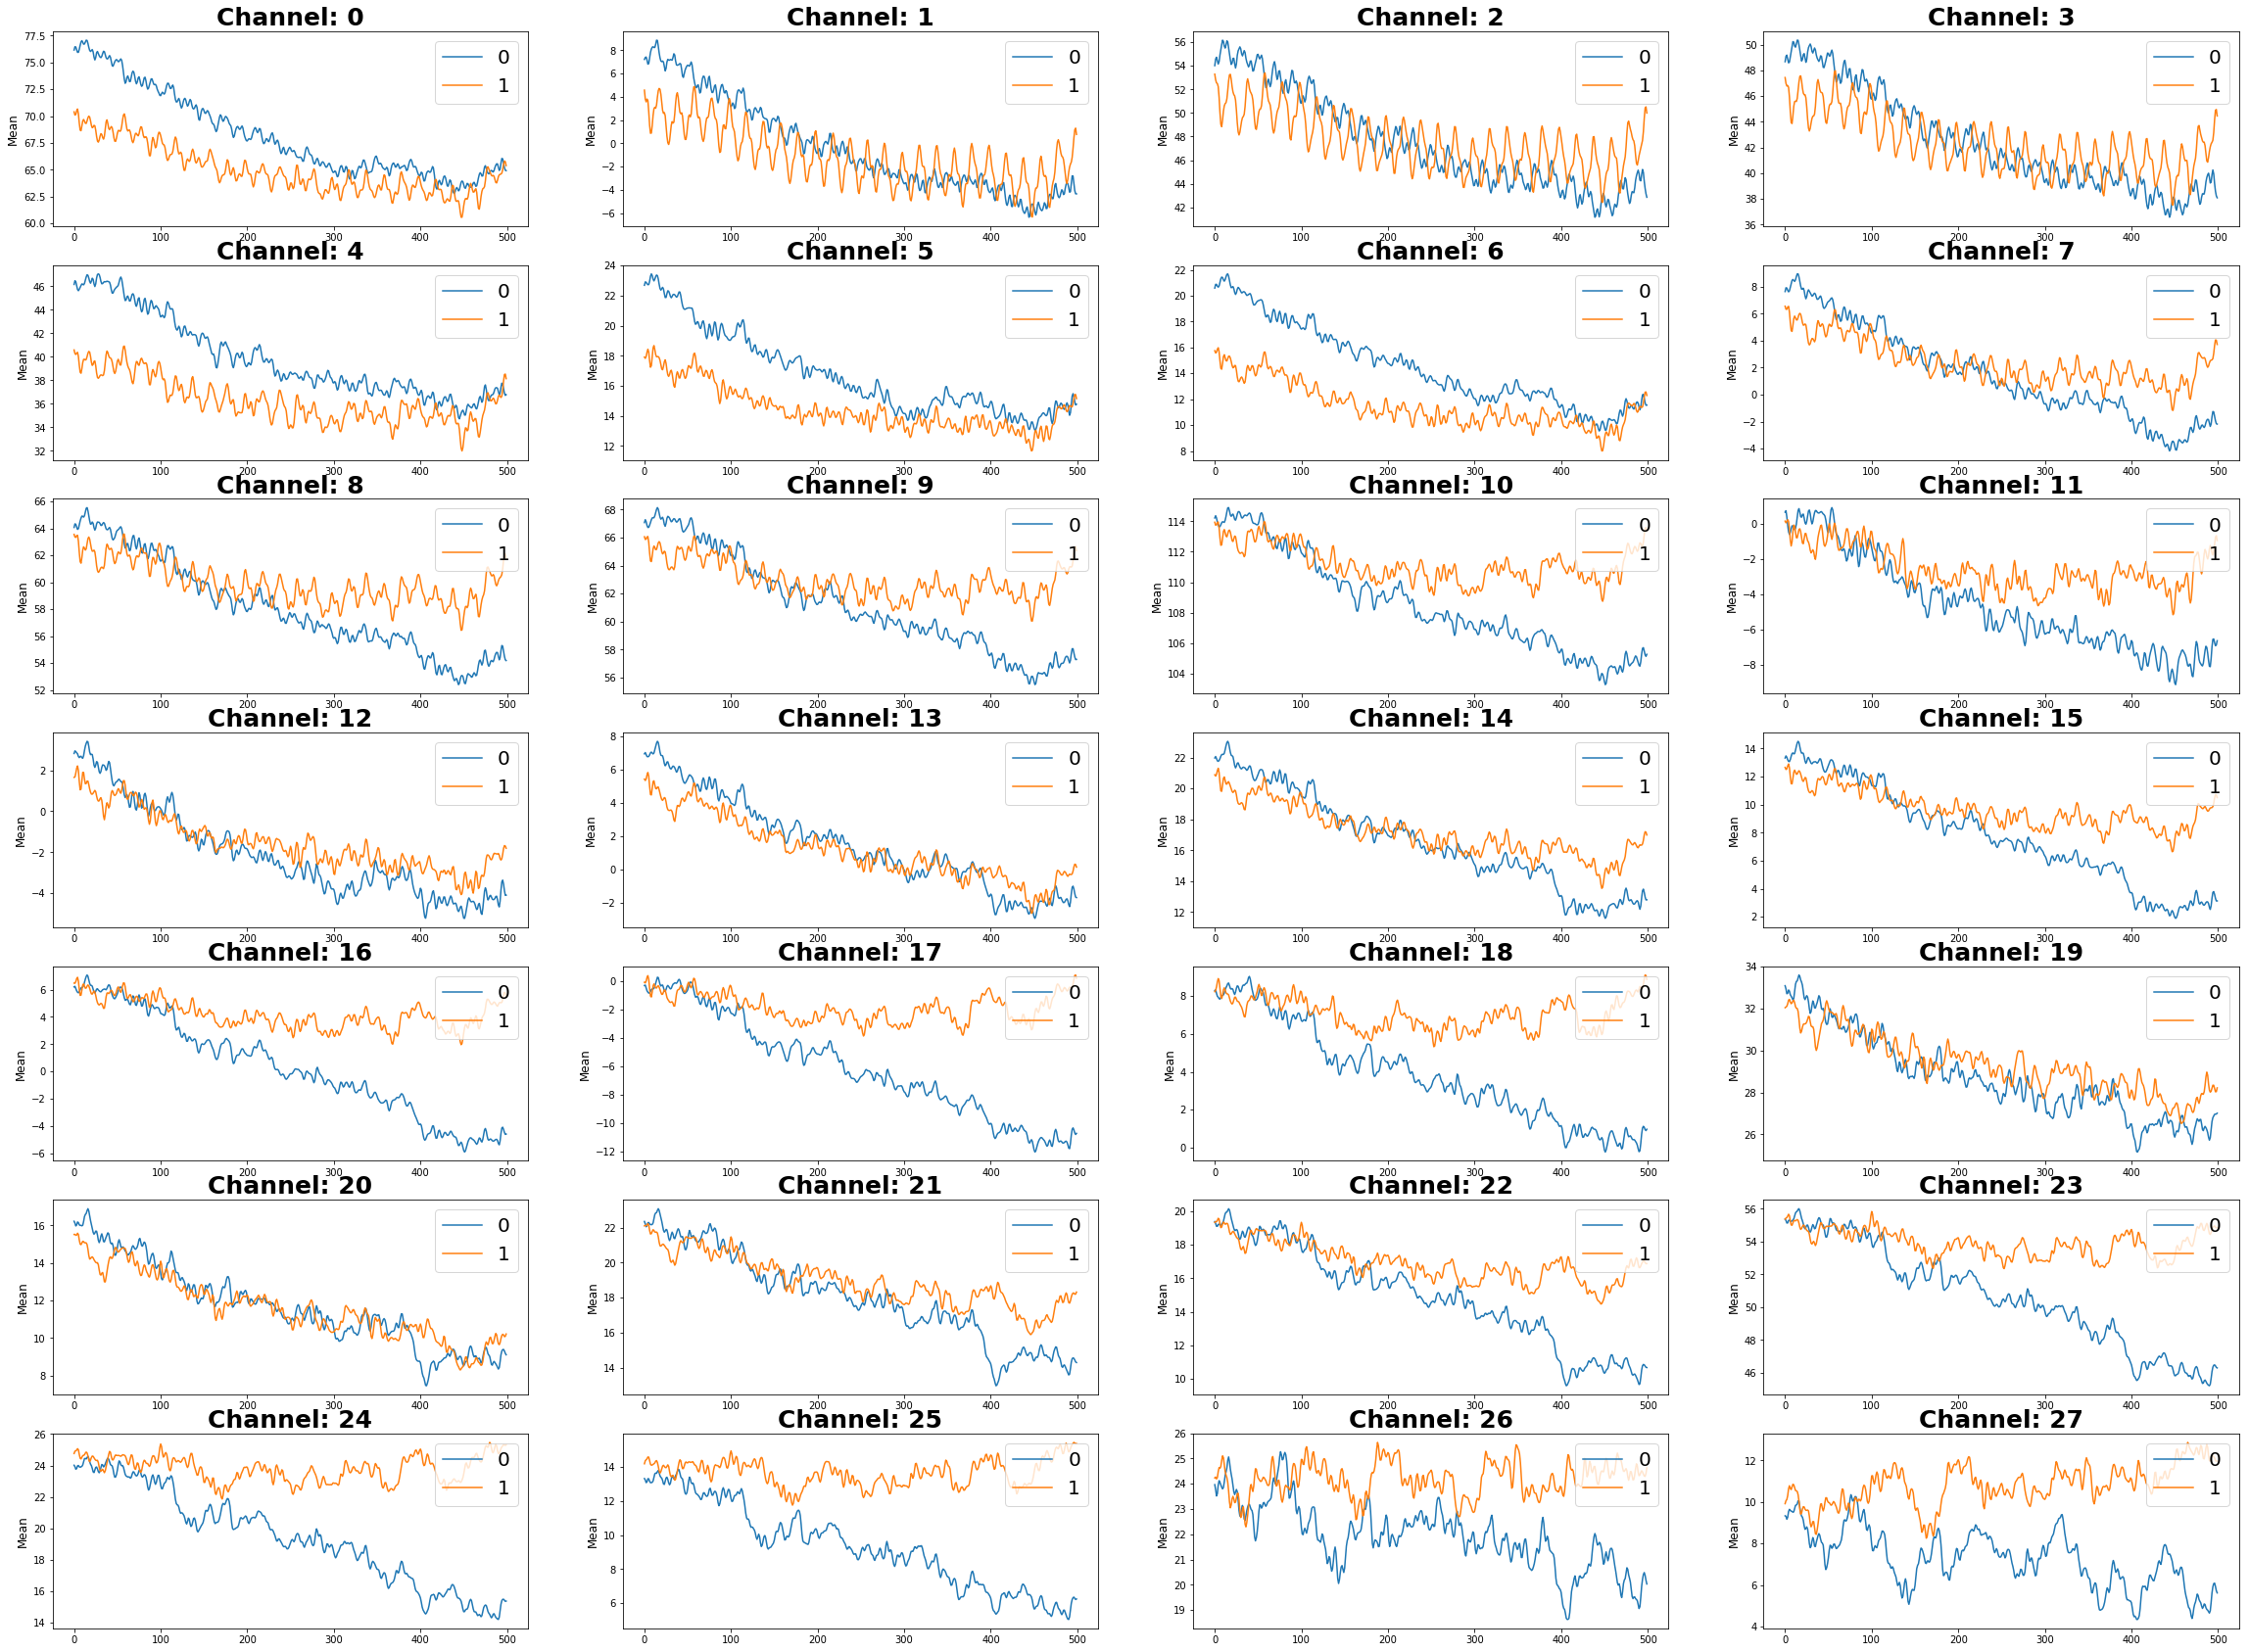

In [23]:
f, ax = plt.subplots(7, 4, figsize=(40, 30))
positions = np.array(range(28)).reshape(7, 4)

for c in range(N_CHA):
    means_1 = list(X_1[:, c, :].mean(0))
    means_0 = list(X_0[:, c, :].mean(0))
    
    pos = np.where(positions==c)
    ax[pos]
    ax[pos[0][0], pos[1][0]].plot(list(zip(means_0, means_1)))
    ax[pos[0][0], pos[1][0]].set_title('Channel: {}'.format(c), fontsize=25, fontweight='bold')
#     ax[pos[0][0], pos[1][0]].set_xlabel('Samples')
    ax[pos[0][0], pos[1][0]].legend([0, 1], loc='upper right', fontsize=20)
    ax[pos[0][0], pos[1][0]].set_ylabel('Mean', fontsize=12)

In [24]:
train_input, train_target = bci.load(root = './data_bci')
X = train_input.numpy()
y = train_target.numpy()

X_1 = X[y==1]
X_0 = X[y==0]